In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# MNIST veri setini yükleme ve eğitim/test setlerine ayırma
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verileri CNN modeline uygun formata dönüştürme ve normalizasyon
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [3]:

# CNN modeli oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Önceki Dropout katmanı
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Yeni Dropout katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Bir diğer Dropout katmanı
model.add(Dense(10, activation='softmax'))


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,818 (1.80 MB)

 Trainable params: 471,818 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.callbacks import EarlyStopping
# Early stopping geri çağrısını oluşturma
early_stopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


In [5]:
# Modeli eğitme
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Modelin başarımını yazdırma
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
# print("Eğitim Doğruluğu:", train_acc)
# print("Test Doğruluğu:", test_acc)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.6926 - loss: 0.8651 - val_accuracy: 0.9838 - val_loss: 0.0617
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9775 - loss: 0.0919 - val_accuracy: 0.9851 - val_loss: 0.0572
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 66ms/step - accuracy: 0.9849 - loss: 0.0622 - val_accuracy: 0.9898 - val_loss: 0.0404
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9878 - loss: 0.0485 - val_accuracy: 0.9904 - val_loss: 0.0437
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9906 - loss: 0.0402 - val_accuracy: 0.9917 - val_loss: 0.0344


In [ ]:
model.save("../models/numbers_model2.h5")

In [4]:
model = tf.keras.models.load_model('../models/model_sayilar2.h5')  

c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


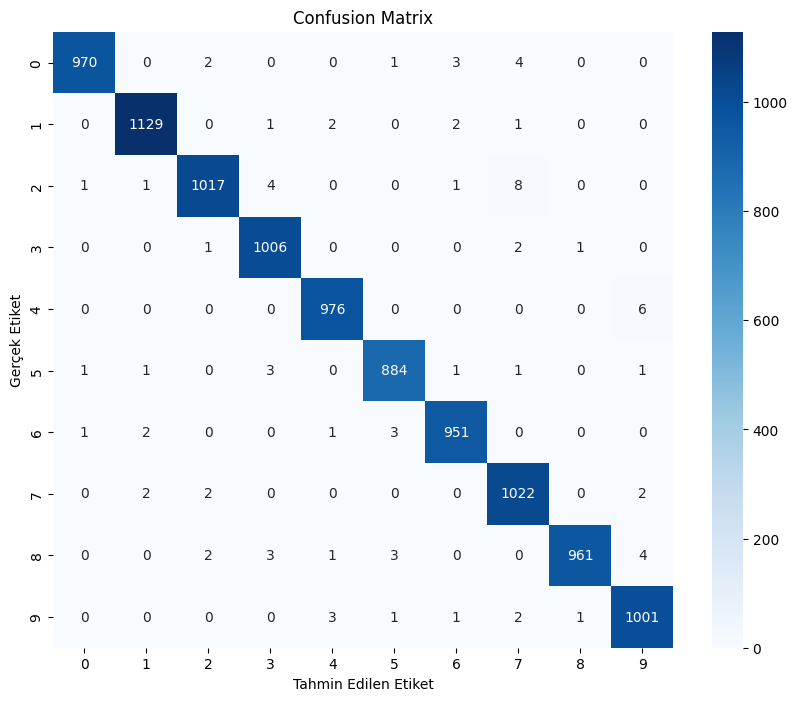

In [7]:
from sklearn.metrics import confusion_matrix
# Test verileri üzerinde tahmin yapın
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Confusion matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Model ile tahmin yapın
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
# Eğer y_test zaten etiketleri içeriyorsa (one-hot encoded değilse)
y_true = train_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [11]:
y_true = test_labels  # Gerçek etiketler test setinden
y_pred_classes = model.predict(test_images)  # Modelin tahmin ettiği sınıflar


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Metrikleri hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Detaylı sınıflandırma raporu
#print(classification_report(y_true, y_pred_classes))


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [3]:
# Önceden eğitilmiş modeli yükle
model = tf.keras.models.load_model('../models/model_sayilar2.h5')  

C:\Users\ayseg\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:

# Kayıp ve doğruluk grafiklerini çizmek için
def plot_history(history):
    # Kayıp
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Kaybı')

    # Doğruluk
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    
    plt.show()


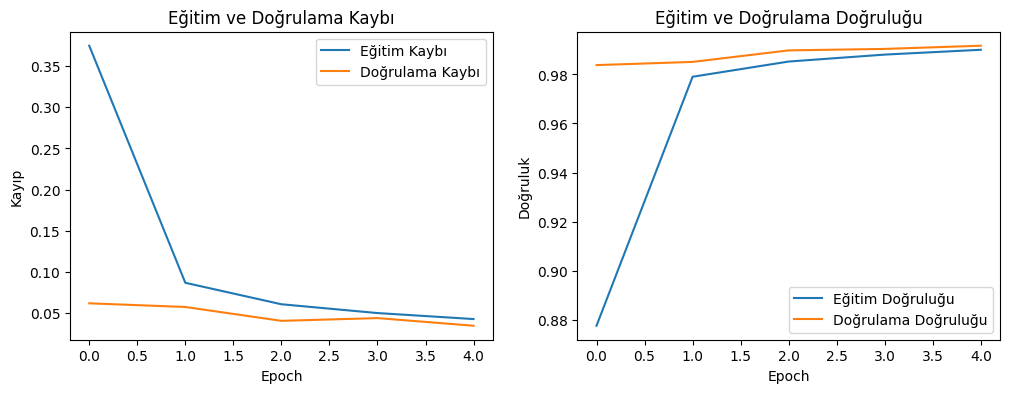

In [11]:
# history nesnesini kullanarak grafik çizme
plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


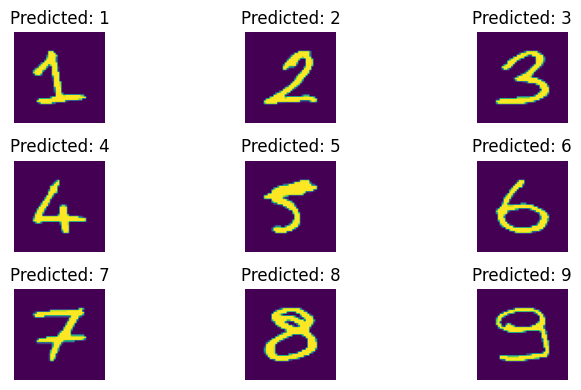

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "../test_data/1.png",
    "../test_data/2.png",
    "../test_data/3.png",
    "../test_data/4.png",
    "../test_data/5.png",
    "../test_data/6.png",
    "../test_data/7.png",
    "../test_data/8.png",
    "../test_data/9.png",
]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(8, 4))
for i, path in enumerate(image_paths, 1):
    plt.subplot(3, 3, i)
    
    # Resmi yükleme ve gösterme
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    
    # Resmi modele uygun formata dönüştürme
    external_image = keras_image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    external_image_array = keras_image.img_to_array(external_image)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon
    
    # Modelde tahmin yapma
    predicted_label = np.argmax(model.predict(external_image_array), axis=-1)
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


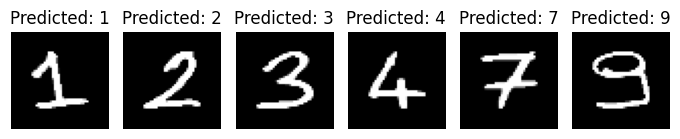

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "../test_data/1.png",
    "../test_data/2.png",
    "../test_data/3.png",
    "../test_data/4.png",
    "../test_data/7.png",
    "../test_data/9.png",
]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(8, 4))
for i, path in enumerate(image_paths, 1):
    plt.subplot(1, 7, i)
    
    # Resmi yükleme ve gösterme
    img = plt.imread(path)
    plt.imshow(img, cmap='gray')  # Grayscale olarak göster
    plt.axis('off')
    
    # Resmi modele uygun formata dönüştürme
    external_image = keras_image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    external_image_array = keras_image.img_to_array(external_image)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon
    
    # Modelde tahmin yapma
    predicted_label = np.argmax(model.predict(external_image_array), axis=-1)
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


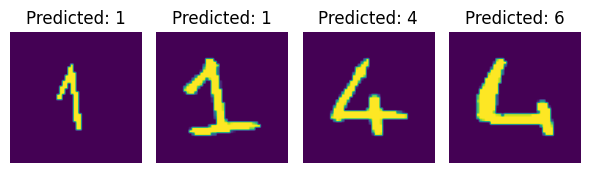

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "../test_data/11.png",
    "../test_data/1.png",
    "../test_data/4.png",
    "../test_data/444.png"
    
]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(6, 4))
for i, path in enumerate(image_paths, 1):
    plt.subplot(1, 4, i)
    
    # Resmi yükleme ve gösterme
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    
    # Resmi modele uygun formata dönüştürme
    external_image = keras_image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    external_image_array = keras_image.img_to_array(external_image)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon
    
    # Modelde tahmin yapma
    predicted_label = np.argmax(model.predict(external_image_array), axis=-1)
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


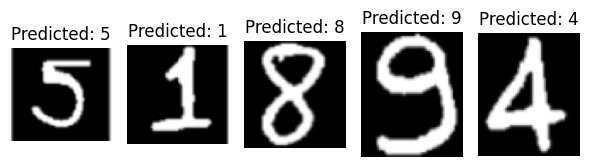

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "../sema/5.png",
    "../sema/1.png",
    "../sema/8.png",
    "../sema/9.png",
    "../sema/4.png"
    
]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(6, 4))
for i, path in enumerate(image_paths, 1):
    plt.subplot(1, 5, i)
    
    # Resmi yükleme ve gösterme
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    
    # Resmi modele uygun formata dönüştürme
    external_image = keras_image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    external_image_array = keras_image.img_to_array(external_image)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon
    
    # Modelde tahmin yapma
    predicted_label = np.argmax(model.predict(external_image_array), axis=-1)
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()